In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
df_X=pd.DataFrame(X)
y_vals=np.array(y)
Xtrain = X[:9900]
Xtest = X[9900:]
ytrain = y[:9900]
ytest = y[9900:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Automatically created module for IPython interactive environment


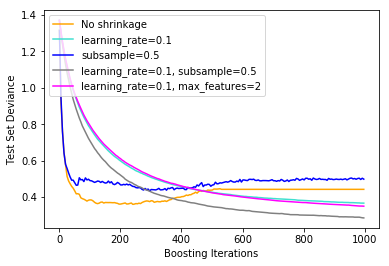

In [6]:
print(__doc__)

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets


X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()

for label, color, setting in [('No shrinkage', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)

    clf = ensemble.GradientBoostingClassifier(**params)
    clf2 = ensemble.RandomForestClassifier()
    #clf2.fit(X_train,y_train)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')

plt.show()

In [13]:
len(y_test)

10000

In [21]:
y_pred=clf.predict_proba(X_test)[:,1]

In [14]:
len(y_pred)

10000

In [30]:
y

array([1, 1, 0, ..., 0, 1, 1])

In [36]:
from sklearn import metrics
clf = ensemble.GradientBoostingClassifier()
clf = ensemble.RandomForestClassifier()

clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.89700498250171889

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


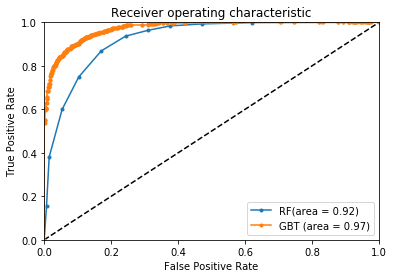

In [54]:
from sklearn.metrics import roc_curve, auc
# Scale columns for regression.
#scaler = StandardScaler()
#X = X.as_matrix().astype(np.float)
#X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
 
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc, thresholds

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,ensemble.RandomForestClassifier)   
#generate_ROCplot(fpr,tpr,'LR',roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.plot(fpr, tpr, '.-',label='RF(area = %0.2f)' % roc_auc)

fpr,tpr,roc_auc, thresholds = generate_auc(X,y,ensemble.GradientBoostingClassifier)   
#generate_ROCplot(fpr,tpr,'LR',roc_auc)
plt.plot(fpr, tpr, '.-',label='GBT (area = %0.2f)' % roc_auc)
plt.legend()

In [49]:
%matplotlib inline

In [32]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])



0.9843601562436245

In [26]:
tpr

array([ nan,  nan,  nan])

In [8]:
dir(clf2)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_make_estimator',
 '_set_oob_score',
 '_validate_X_predict',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'estimator_params',
 'estimators_',
 'feature_importances_',
 'fit',
 'fit_transform',
 'get_params',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_i

In [9]:
clf2.fit(X_train,y_train)
clf2.score(y_test, y_pred)

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Number of features of the model must match the input. Model n_features is 10 and input n_features is 10000 

In [3]:

# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

ModuleNotFoundError: No module named 'xgboost'

In [3]:
dir(clf)

['C',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 '_predict_proba_lr',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'fit',
 'fit_intercept',
 'fit_transform',
 'get_params',
 'intercept_',
 'intercept_scaling',
 'max_iter',
 'multi_class',
 'n_iter_',
 'n_jobs',
 'penalty',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'random_state',
 'score',
 'set_params',
 'solver',
 'sparsify',
 'tol',
 'transform',
 'verbose',
 'warm_start']

array([[ 0.51612414, -0.03407962, -0.07915684,  0.00405444, -0.04846455,
        -0.61914256, -0.02032083, -0.11794372, -0.65193273, -0.05508235]])

In [10]:
from sklearn import metrics
import pandas as pd
%matplotlib inline

df_X=pd.DataFrame(X)
df_X['score']=clf.predict_proba(df_X)[:,1]
df_X['outcome']=y_vals


In [6]:
def p(beta,x):
    return 1/(1 + np.exp(-np.dot(beta,x)))

def log_like(X,y,beta):
    vals = [y[i]*np.log(p(beta,X[i])) + (1-y[i])*np.log(1-p(beta,X[i])) for i in range(len(X))]
    return np.sum(vals)

In [7]:
log_like(X,y,clf.coef_)

-3885.0144621988256

In [97]:
log_like(X,y,clf.coef_-0.1)

-3756.8278047138433

In [38]:
logs = []
coefs=[]
for i in range(1,20):
    coef = clf.coef_[0]*np.sin(i/7)
    coefs.append(i)
    logs.append(log_like(X,y,coef))
    

In [9]:
import matplotlib.pyplot as plt
plt.plot(coefs,logs)

NameError: name 'coefs' is not defined

In [21]:
clf.coef_[0]

array([ 0.15126347,  0.3734576 , -0.0322838 , -0.21999793, -0.03405179,
       -0.22360951,  0.00567198, -1.31276682,  0.03643517,  0.2148952 ])

In [ ]:
plt.plot(coefs,logs)

In [87]:
clf.coef_

array([[ 0.51612414, -0.03407962, -0.07915684,  0.00405444, -0.04846455,
        -0.61914256, -0.02032083, -0.11794372, -0.65193273, -0.05508235]])

0.0


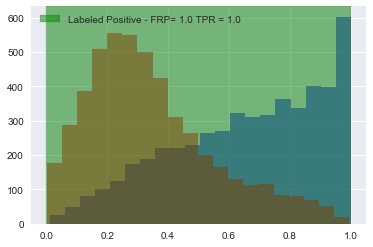

0.1


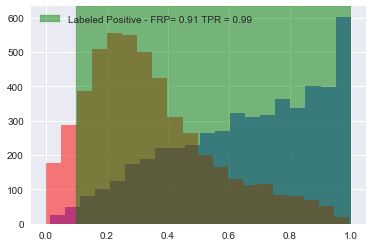

0.2


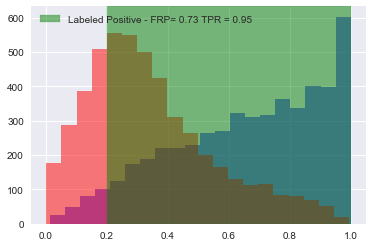

0.3


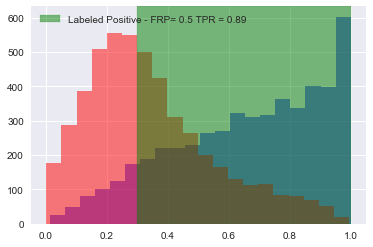

0.4


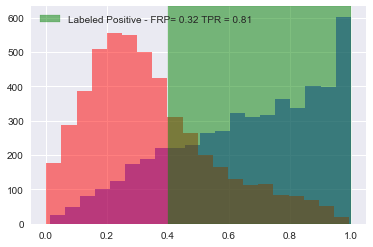

0.5


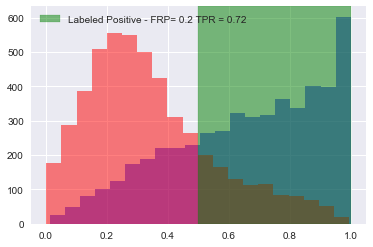

0.6


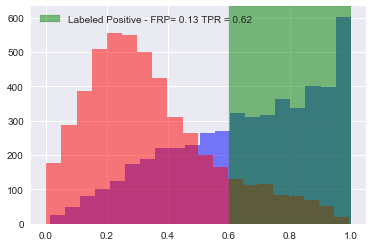

0.7


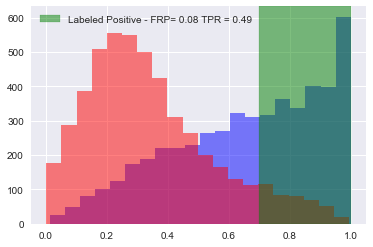

0.8


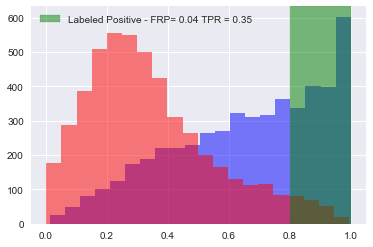

0.9


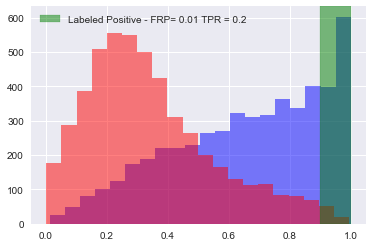

1.0


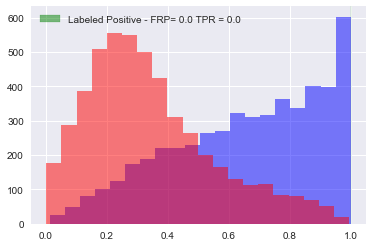

In [72]:
import seaborn
import matplotlib.pyplot as plt
fprs=[]
tprs=[]
for i in range(0,11):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    fpr = np.round(len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==0]),2)
    tpr = np.round(len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==1]),2)
    fprs.append(fpr)
    tprs.append(tpr)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - FRP= ' + str(fpr)+' TPR = ' + str(tpr))
    plt.legend()
    plt.savefig("../img/roc_" + str(i) + ".png")
    plt.show()



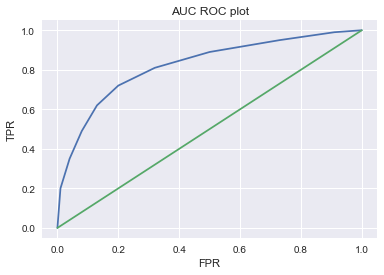

In [75]:
plt.title('AUC ROC plot')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.plot(fprs,tprs)
plt.plot(fprs,fprs)
plt.savefig('../img/roc_final.png')

0.0


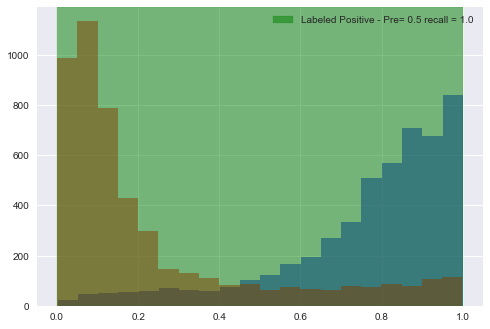

0.1


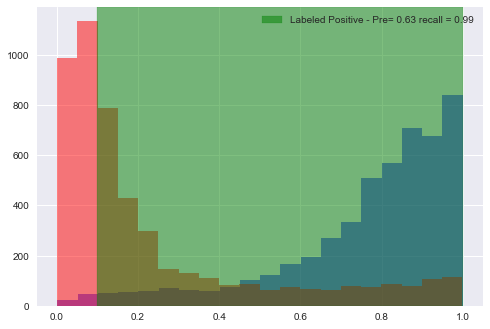

0.2


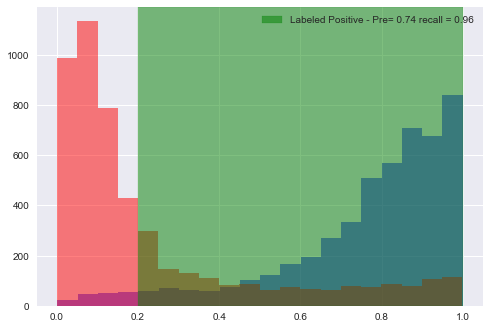

0.3


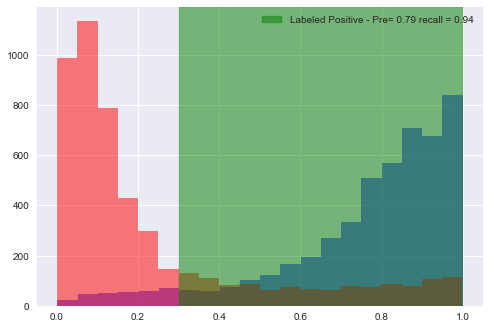

0.4


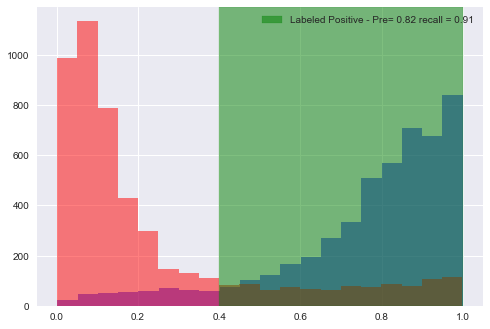

0.5


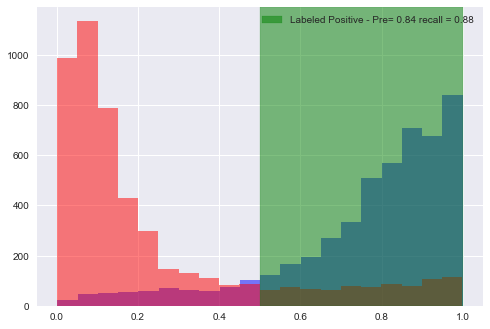

0.6


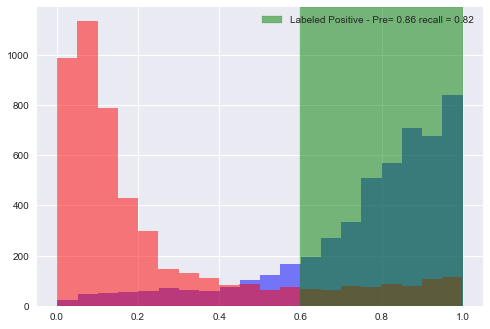

0.7


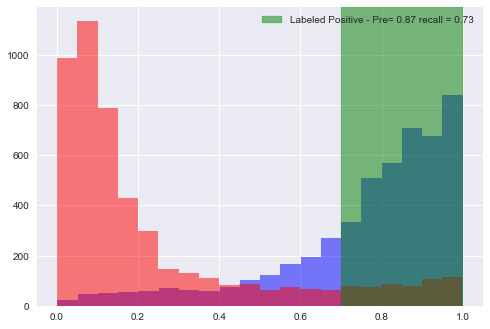

0.8


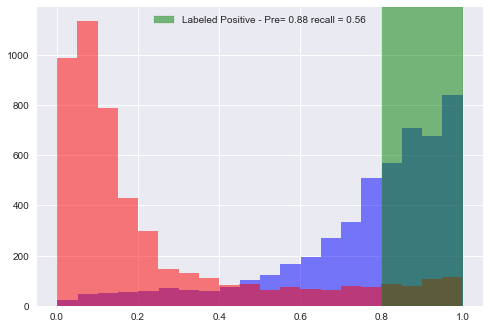

0.9


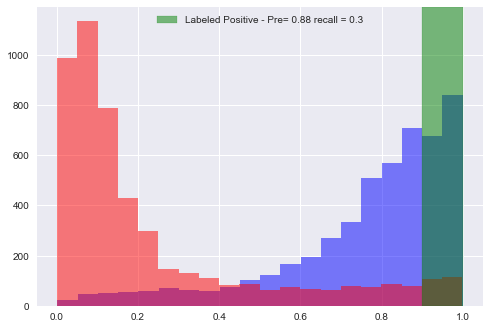

In [55]:
import seaborn
import matplotlib.pyplot as plt
precisions=[]
recalls=[]
for i in range(0,10):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    tp=len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])
    fp = len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])
    fn = len(df_X[(df_X['outcome']==1) & (df_X['score']<threshold)])
    precision = np.round(tp/(tp+fp),2)
    recall = np.round(tp/(tp+fn),2)
    precisions.append(precision)
    recalls.append(recall)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - Pre= ' + str(precision)+' recall = ' + str(recall))
    plt.legend()
    plt.savefig("../img/prec_recall_" + str(i) + ".png")
    plt.show()


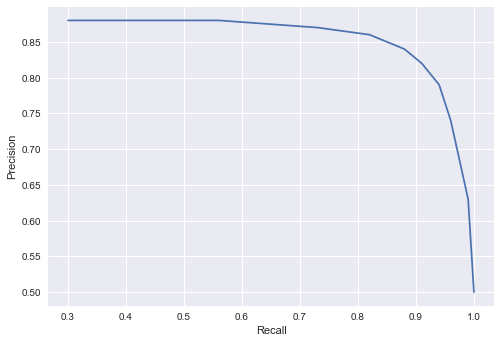

In [56]:

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.plot(recalls,precisions)

In [46]:
recalls

[1.0,
 0.9859943977591037,
 0.963985594237695,
 0.938375350140056,
 0.9141656662665066,
 0.8791516606642658,
 0.8217286914765907,
 0.728891556622649,
 0.5598239295718287,
 0.30392156862745096]

In [47]:
precisions

[0.4998,
 0.6309859154929578,
 0.7431744562702453,
 0.7937045185310543,
 0.8236884802595997,
 0.8446751249519415,
 0.8597446095876072,
 0.8702818920210225,
 0.8779416379039849,
 0.875]

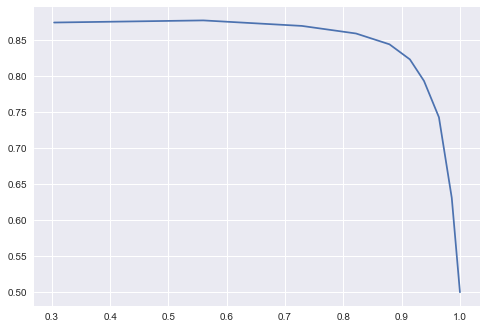

In [49]:
plt.plot(recalls,precisions)

In [5]:
x=np.linspace(0, 1, num=100)

In [6]:
y = [1.0/k for k in x]

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


First some definitions:
    
- Let $p = p(\textrm{purchase} | \textrm{ shared })$, the probability that someone purchases
one of your tickets given that it was shared to them.

- $p_s(n) = p_s$ be the probability that someone shares Robbie's link at the nth step.

- $M$ is the amoutn of friends the person has originally. Due to how imbred the music scene is, let's say that
at the $kth$ step, the amoutn of new friends someone can share with is $M/2^k$. Although it's probably far worse.

- Then we can computed the expected number of Robbie's points:

$$ \mathbb{E} (\textrm{points}) = pM + \frac{1}{2} \sum_{i=1}^N p \left(\frac{p_s}{2}\right)^n M. $$

The geometric distribution arising from:

$$p ( \textrm{ nth person purchase | you share }) = pp_s^{n-1}$$

We can then computed the expected number of comps that all of the desperate people in the music scene will be asking for repeatedly. After computing the sum and rearranging, we multiply by a third to get comps: 

$$ \mathbb{E} (\textrm{comps}) = \frac{Mp}{300} \frac{4-p_s}{2-p_s}.$$

So for instance, if the probability of purchasing is $p=1/10$ and $p_s = 1/10$ then we get

$$ \mathbb{E} (\textrm{comps}) \sim \frac{M}{500}.$$

**However we have not considered how fucking long Robbie's post is.**

Let's now plot a simulation of $$p( \textrm{ read robbie's long fucking message | # of words })$$


So basically it was all a waste of our time. 


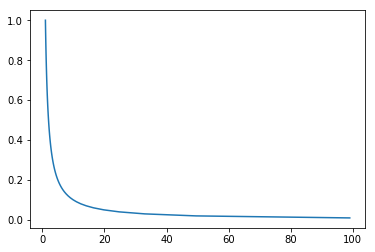

In [12]:
plt.plot(y,x)

In [55]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

In [69]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor


In [70]:
from sklearn.datasets import make_hastie_10_2
from sklearn.cross_validation import train_test_split

# generate synthetic data from ESLII - Example 10.2
X, y = make_hastie_10_2(n_samples=5000)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# fit estimator
est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est.fit(X_train, y_train)

# predict class labels
pred = est.predict(X_test)

# score on test data (accuracy)
acc = est.score(X_test, y_test)
print('ACC: %.4f' % acc)

# predict class probabilities
est.predict_proba(X_test)[0]
ACC: 0.9240

ACC: 0.9200


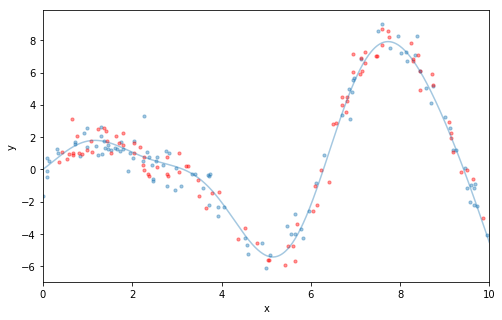

In [71]:
import numpy as np

def ground_truth(x):
    """Ground truth -- function to approximate"""
    return x * np.sin(x) + np.sin(2 * x)

def gen_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(13)
    x = np.random.uniform(0, 10, size=n_samples)
    x.sort()
    y = ground_truth(x) + 0.75 * np.random.normal(size=n_samples)
    train_mask = np.random.randint(0, 2, size=n_samples).astype(np.bool)
    x_train, y_train = x[train_mask, np.newaxis], y[train_mask]
    x_test, y_test = x[~train_mask, np.newaxis], y[~train_mask]
    return x_train, x_test, y_train, y_test

X_train, X_test, y_train, y_test = gen_data(200)

# plot ground truth
x_plot = np.linspace(0, 10, 500)

def plot_data(figsize=(8, 5)):
    fig = plt.figure(figsize=figsize)
    gt = plt.plot(x_plot, ground_truth(x_plot), alpha=0.4, label='ground truth')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=10, alpha=0.4)
    plt.scatter(X_test, y_test, s=10, alpha=0.4, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')

plot_data(figsize=(8, 5))

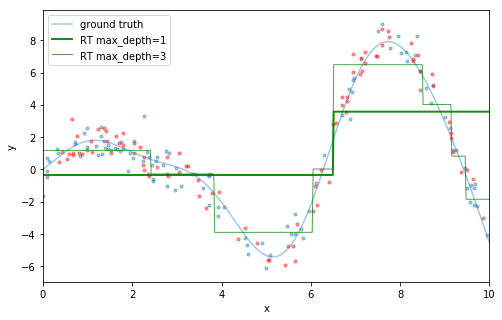

In [72]:
from sklearn.tree import DecisionTreeRegressor
plot_data()
est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=1', color='g', alpha=0.9, linewidth=2)

est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]),
         label='RT max_depth=3', color='g', alpha=0.7, linewidth=1)

plt.legend(loc='upper left')

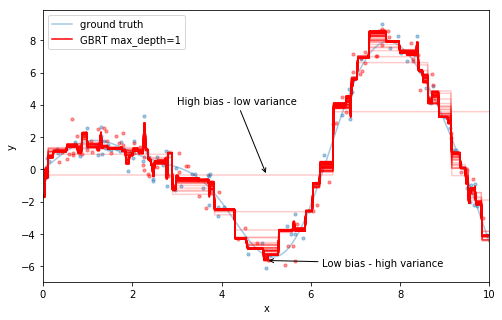

In [73]:
from itertools import islice

plot_data()

est = GradientBoostingRegressor(n_estimators=1000, max_depth=1, learning_rate=1.0)
est.fit(X_train, y_train)

ax = plt.gca()
first = True

# step over prediction as we added 20 more trees.
for pred in islice(est.staged_predict(x_plot[:, np.newaxis]), 0, 1000, 10):
    plt.plot(x_plot, pred, color='r', alpha=0.2)
    if first:
        ax.annotate('High bias - low variance', xy=(x_plot[x_plot.shape[0] // 2],
                                                    pred[x_plot.shape[0] // 2]),
                                                    xycoords='data',
                                                    xytext=(3, 4), textcoords='data',
                                                    arrowprops=dict(arrowstyle="->",
                                                                    connectionstyle="arc"))
        first = False

pred = est.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, pred, color='r', label='GBRT max_depth=1')
ax.annotate('Low bias - high variance', xy=(x_plot[x_plot.shape[0] // 2],
                                            pred[x_plot.shape[0] // 2]),
                                            xycoords='data', xytext=(6.25, -6),
                                            textcoords='data', arrowprops=dict(arrowstyle="->",
                                                                               connectionstyle="arc"))
plt.legend(loc='upper left')

In [67]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics

class DecisionTree():
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

ImportError: dlopen(/Users/dgoldma1/anaconda/lib/python3.6/site-packages/cv2/cv2.cpython-36m-darwin.so, 2): Symbol not found: _clock_gettime
  Referenced from: /Users/dgoldma1/anaconda/lib/python3.6/site-packages/cv2/.dylibs/libavutil.55.78.100.dylib (which was built for Mac OS X 10.12)
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/dgoldma1/anaconda/lib/python3.6/site-packages/cv2/.dylibs/libavutil.55.78.100.dylib

In [ ]:
df

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


MSE: 2137657325.7973
R2: 0.8411


/Users/dgoldma1/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function staged_decision_function is deprecated;  and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


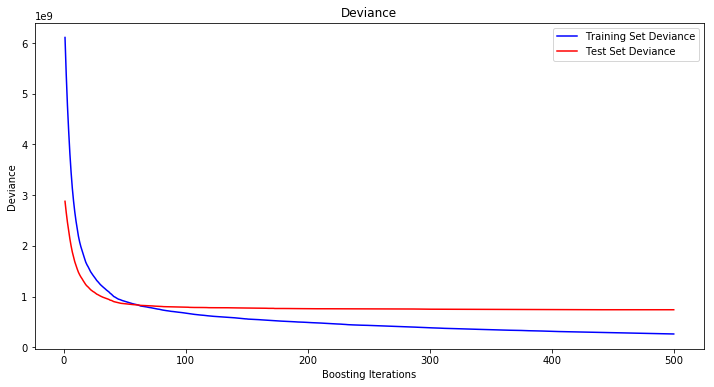

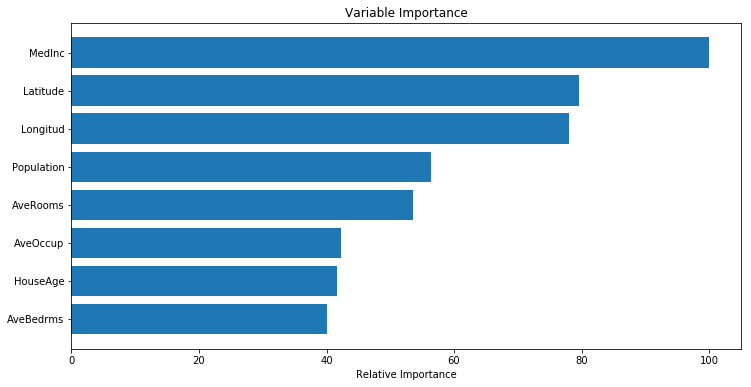

/Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


SystemError: <class 'RuntimeError'> returned a result with an error set

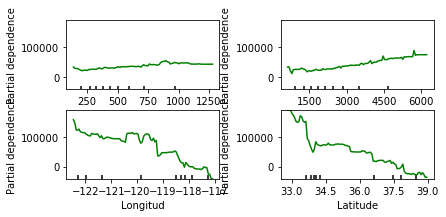

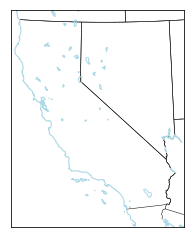

In [79]:
# =============
# Introduction
# =============
# I've been doing some data mining lately and specially looking into `Gradient
# Boosting Trees <http://en.wikipedia.org/wiki/Gradient_boosting>`_ since it is
# claimed that this is one of the techniques with best performance out of the
# box.  In order to have a better understanding of the technique I've reproduced
# the example of section *10.14.1 California Housing* in the book `The Elements of Statistical Learning <http://www-stat.stanford.edu/~tibs/ElemStatLearn/>`_.
# Each point of this dataset represents the house value of a property with some
# attributes of that house. You can get the data and the description of those
# attributes from `here <http://lib.stat.cmu.edu/modules.php?op=modload&name=Downloads&file=index&req=getit&lid=83>`_.

# I know that the whole exercise here can be easily done with the **R** package
# `gbm <http://cran.r-project.org/web/packages/gbm/index.html>`_ but I wanted to
# do the exercise using Python. Since learning several languages well enough is
# difficult and time consuming I would prefer to stick all my data analysis to
# Python instead doing it in R, even with R being superior on some cases. But
# having only one language for doing all your scripting, systems programming and
# prototyping *PLUS* your data analysis is a good reason for me. Your upfront
# effort of learning the language, setting up your tools and editors, etc. is
# done only once instead of twice. 
# 
# Data Preparation
# -----------------
# The first thing to do is to load the data into a `Pandas <http://pandas.pydata.org/pandas-docs/stable/>`_  dataframe

import numpy as np
import pandas as pd

columnNames = ['HouseVal','MedInc','HouseAge','AveRooms',
               'AveBedrms','Population','AveOccup','Latitude','Longitud']

df = pd.read_csv('/Users/dgoldma1/Downloads/cadata.txt',skiprows=27, sep='\s+',names=columnNames)

# Now we have to split the datasets into training and validation. The training
# data will be used to generate the trees that will constitute the final
# averaged model.

import random

X = df.drop(['HouseVal'],1) #[df.columns - ['HouseVal']]
Y = df['HouseVal']
rows = random.sample(list(df.index), int(len(df)*.80))
x_train, y_train = X.ix[rows],Y.ix[rows]
x_test,y_test  = X.drop(rows),Y.drop(rows)

# We then fit a Gradient Tree Boosting model to the data using the
# `scikit-learn <http://scikit-learn.org/stable/>`_ package. We will use 500 trees
# with each tree having a depth of 6 levels. In order to get results similar to
# those in the book we also use the `Huber loss function <http://en.wikipedia.org/wiki/Huber_loss_function>`_ .

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 500, 'max_depth': 6,
        'learning_rate': 0.1, 'loss': 'huber','alpha':0.95}
clf = GradientBoostingRegressor(**params).fit(x_train, y_train)

# For me, the Mean Squared Error wasn't much informative and used instead the
# :math:`R^2` **coefficient of determination**. This measure is a number
# indicating how well a variable is able to predict the other. Numbers close to
# 0 means poor prediction and numbers close to 1 means perfect prediction. In the
# book, they claim a 0.84 against a 0.86 reported in the paper that created the
# dataset using a highly tuned algorithm. I'm getting a good 0.83 without much
# tunning of the parameters so it's a good out of the box technique.

mse = mean_squared_error(y_test, clf.predict(x_test))
r2 = r2_score(y_test, clf.predict(x_test))

print("MSE: %.4f" % mse)
print("R2: %.4f" % r2)

# Let's plot how does it behave the training and testing error

import matplotlib.pyplot as plt

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_decision_function(x_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
                label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
                label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# As you can see in the previous graph, although the train error keeps going
# down as we add more trees to our model, the test error remains more or less
# constant and doesn't incur in overfitting. This is mainly due to the shrinkage
# parameter and one of the good features of this algorithm.


# When doing data mining as important as finding a good model is being able to
# interpret it, because based on that analysis and interpretation preemptive
# actions can be performed. Although base trees are easily interpretable when
# you are adding several of those trees interpretation is more difficult. You
# usually rely on some measures of the predictive power of each feature. Let's
# plot feature importance in predicting the House Value.

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Once variable importance has been identified we could try to investigate how
# those variables interact between them. For instance, we can plot the
# dependence of the target variable with another variable has been averaged over
# the values of the other variables not being taken into consideration. Some
# variables present a clear monotonic dependence with the target value, while
# others seem not very related to the target variable even when they ranked high
# in the previous plot. This could be signaling an interaction between variables
# that could be further studied. 

from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, axs = plot_partial_dependence(clf, x_train, 
                                   features=[3,2,7,6],
                                   feature_names=x_train.columns,
                                   n_cols=2)

fig.show()

# The last step performed was to explore the capabilities of the Python
# libraries when plotting data in a map. Here we are plotting the predicted
# House Value in California using Latitude and Longitude as the axis for
# plotting this data in the map.

from mpl_toolkits.basemap import Basemap
predDf = pd.DataFrame(x_test.copy())
predDf['y_pred'] = clf.predict(x_test)

def california_map(ax=None, lllat=31.5,urlat=42.5,
                   lllon=-124,urlon=-113):
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    m.drawstates()
    m.drawcountries()
    m.drawcoastlines(color='lightblue')
    return m

plt.figure()
m= california_map()
predDf = predDf.sort_values('y_pred') # Useful for plotting
x,y = m(predDf['Longitud'],predDf['Latitude'])
serieA = (np.array(predDf['y_pred']) - predDf['y_pred'].min())/(predDf['y_pred'].max()-predDf['y_pred'].min())
# z = plt.cm.jet(serieA)
z = np.array(predDf['y_pred'])/1000
m.scatter(x,y,c=z,s=60,alpha=0.5,edgecolors='none')
c = m.colorbar(location='right')
c.set_label("House Value (Thousands of $)")
m.plot()
plt.show()


# Addendum
# --------
# This blog post was written using `Pylit <http://pylit.berlios.de/>`_ as the tool
# for doing `Literate Programming <http://en.wikipedia.org/wiki/Literate_programming>`_. 
# I think that literate programming is way superior to other software
# methodologies like TDD when coding algorithms for data analysis. The main
# problem I find right now is the lack of tooling for really taking advantage of
# literate programming, but this is a technique that I'm definitely going to
# research deepe I think that literate programming is way superior to other
# software methodologies like TDD when coding algorithms for data analysis. The
# main problem I find right now is the lack of tooling for really taking
# advantage of literate programming, but this is a technique that I'm definitely
# going to research deeper.

In [77]:
df

,HouseVal,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitud
0,452600.0,8.3252,41.0,880.0,129.0,322.0,126.0,37.88,-122.23
1,358500.0,8.3014,21.0,7099.0,1106.0,2401.0,1138.0,37.86,-122.22
2,352100.0,7.2574,52.0,1467.0,190.0,496.0,177.0,37.85,-122.24
3,341300.0,5.6431,52.0,1274.0,235.0,558.0,219.0,37.85,-122.25
4,342200.0,3.8462,52.0,1627.0,280.0,565.0,259.0,37.85,-122.25
5,269700.0,4.0368,52.0,919.0,213.0,413.0,193.0,37.85,-122.25
6,299200.0,3.6591,52.0,2535.0,489.0,1094.0,514.0,37.84,-122.25
7,241400.0,3.1200,52.0,3104.0,687.0,1157.0,647.0,37.84,-122.25
8,226700.0,2.0804,42.0,2555.0,665.0,1206.0,595.0,37.84,-122.26
9,261100.0,3.6912,52.0,3549.0,707.0,1551.0,714.0,37.84,-122.25


In [61]:
dir(tree)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_estimator_type',
 '_get_param_names',
 '_validate_X_predict',
 'apply',
 'class_weight',
 'classes_',
 'criterion',
 'decision_path',
 'feature_importances_',
 'fit',
 'fit_transform',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_split',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_classes_',
 'n_features_',
 'n_outputs_',
 'predict',
 'presort',
 'random_state',
 'score',
 'set_params',
 'spl

In [95]:
import scipy.stats as stats
import seaborn as sns
plt.style.use('ggplot')

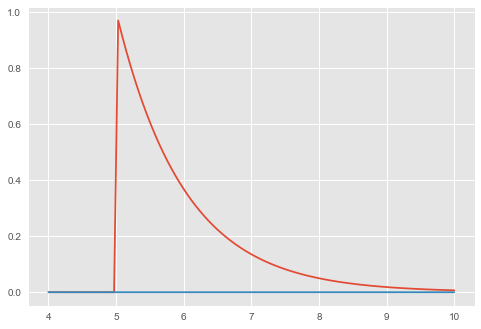

In [96]:
x = np.linspace(4, 10, 100)
plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x))

In [83]:
%precision 10

'%.10f'

In [166]:
df=pd.DataFrame({'age':np.ceil(y),'reward':r})

In [167]:
df.sort_values('age').tail(10)

,age,reward
3493,30.0,-1
853,30.0,-1
6663,30.0,-1
3749,30.0,-1
6566,31.0,1
7911,31.0,1
3503,31.0,1
1542,31.0,1
7609,31.0,1
4439,33.0,1


### True reward

In [156]:
h_true =1 - stats.norm(loc=20,scale=3).cdf(30)
h_true

0.0004290603

### Sampling from distribution

In [170]:
n = 10000
y = stats.norm(loc=20,scale=3).rvs(n)
r = [1 if y_val > 30 else -1 for y_val in y]
h_mc = 1.0/n * np.sum(y>30)
# estimate and relative error
h_mc, np.abs(h_mc - h_true)/h_true

(0.0001000000, 0.7669325448)

### Importance sampling

In [171]:
n = 10000
y = stats.expon(loc=30).rvs(n)
h_is = 1.0/n * np.sum(stats.norm(loc=20,scale=3).pdf(y)/stats.expon(loc=30).pdf(y))
# estimate and relative error
h_is, np.abs(h_is- h_true)/h_true

(0.0004298905, 0.0019349490)

(array([ 947.,  854.,  756.,  680.,  653.,  585.,  524.,  431.,  444.,
         357.,  335.,  323.,  301.,  249.,  231.,  213.,  196.,  184.,
         142.,  159.,  137.,  105.,  110.,  117.,   94.,   79.,   72.,
          72.,   66.,   52.,   43.,   50.,   50.,   36.,   43.,   40.,
          21.,   21.,   24.,   15.,   25.,   11.,   14.,   14.,   10.,
          10.,    7.,    5.,   10.,    6.,    3.,    6.,    3.,    8.,
           6.,    5.,    8.,    5.,    7.,    3.,    4.,    2.,    2.,
           3.,    1.,    0.,    0.,    0.,    1.,    0.,    1.,    0.,
           0.,    3.,    1.,    1.,    0.,    0.,    2.,    1.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  5.0000489477,   5.0961994332,   5.1923499188,   5.2885004043,
          5.3846508898,   5.4808013753,   5.5769518608,   5.6731023463,
          5.7692528318,   5.8654033173,   5.9615538029,   6.057704

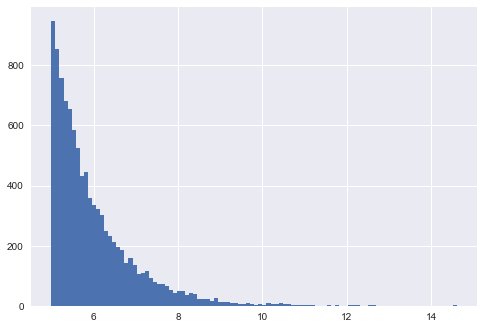

In [91]:
plt.hist(y,bins=100)

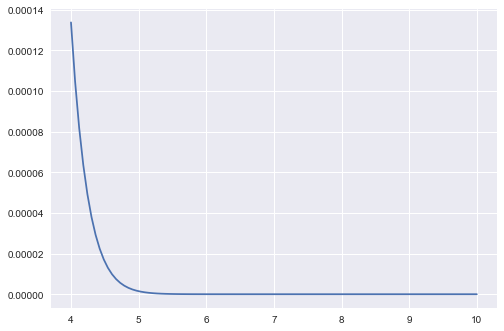

In [93]:
x = np.linspace(4, 10, 100)
#plt.plot(x, stats.expon(5).pdf(x))
plt.plot(x, stats.norm().pdf(x));